### Dataset pulled from Kaggle (https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)

# Data Cleaning:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#open csv file
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Information about Features:
- Gender: Male or Female
- Age: Age of patient
- Hypertension: 1- Yes, 0- No
- Heart Disease: 1- Yes, 0- No
- Ever Married: Yes or No
- Work Type: Private or Self-employed
- Residence Type: Rural or Urban
- Avg Glucose Level: Average glucose level
- BMI: Body Mass Index (<18.5 = Underweight, 18.5-24.9 = Normal Weight, 25-29.9 = Overweight, >30 = Obese)
- Smoking Status: Smokes, Formerly Smoked, Never Smoked
- Stroke: 1- Yes, 0- No

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df = df.dropna(how='any',axis=0) 

In [7]:
df['hypertension'].value_counts() 

0    4458
1     451
Name: hypertension, dtype: int64

In [8]:
df['heart_disease'].value_counts() 

0    4666
1     243
Name: heart_disease, dtype: int64

In [9]:
df['ever_married'].value_counts() 

Yes    3204
No     1705
Name: ever_married, dtype: int64

In [10]:
df['work_type'].value_counts() 

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [11]:
df['Residence_type'].value_counts() 

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

In [12]:
df['smoking_status'].value_counts() 

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [13]:
#remove observations where smoking_status is unknown
df = df[df['smoking_status'] != 'Unknown']

In [14]:
df['smoking_status'].value_counts() 

never smoked       1852
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [15]:
df['stroke'].value_counts() 

0    3246
1     180
Name: stroke, dtype: int64

# Feature Engineering

In [16]:
#create a list of conditions
conditions = [
    (df['bmi'] < 18.5),
    (df['bmi'] >=18.5) & (df['bmi'] <= 24.9),
    (df['bmi'] >=25) & (df['bmi'] <=29.9),
    (df['bmi'] >= 30)
]

#create list of values we want to assign for each condition
values =['underweight', 'normal', 'overweight', 'obese']

df['bmi_class'] = np.select(conditions, values)

In [17]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_class
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,obese
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,obese
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,obese
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,normal
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,overweight


# EDA

In [19]:
import seaborn as sns

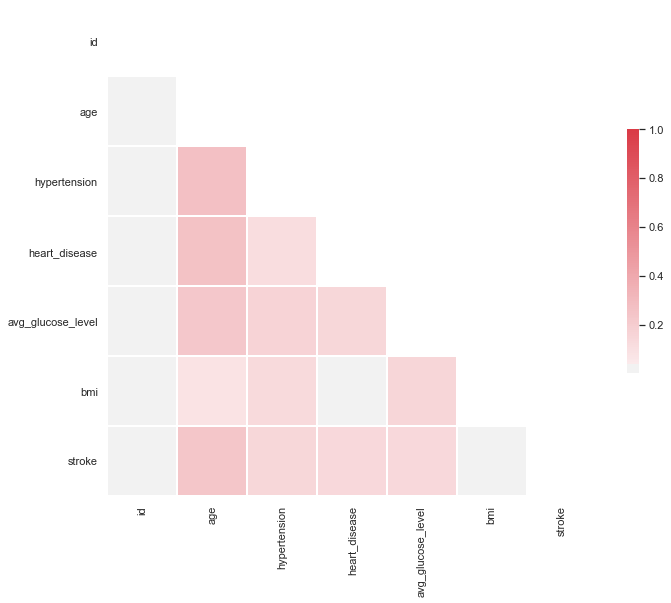

In [20]:
sns.set(style="white")  #using a heat map to display the visuals for the correlations in the dataset
# Compute the correlation matrix
corr = np.abs(df.corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

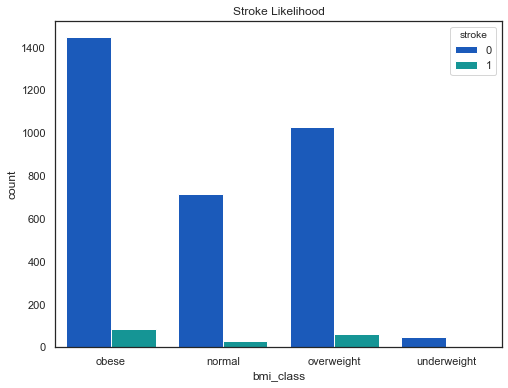

In [24]:
#Multiple Bars Bar Chart of Inflight Entertainment compared to Satisfied/Dissatisfied customers
plt.figure(figsize=(8,6))
ax = sns.countplot(x=df['bmi_class'], hue=df.stroke, palette = "winter")
ax.set_title("Stroke Likelihood")
plt.show()